In [7]:
# link:http://gidahatari.com/ih-es/como-generar-una-regresion-lineal-con-python-3-tutorial#importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
processDf = pd.read_csv('processDf.csv')
processDf.head()

,Time Lapse (hr),Image Number,Total Size (mb)
0,0.40,50.0,290.0
1,0.79,100.0,579.0
2,1.22,150.0,869.0
3,1.77,200.0,1162.0
4,2.18,250.0,1460.0


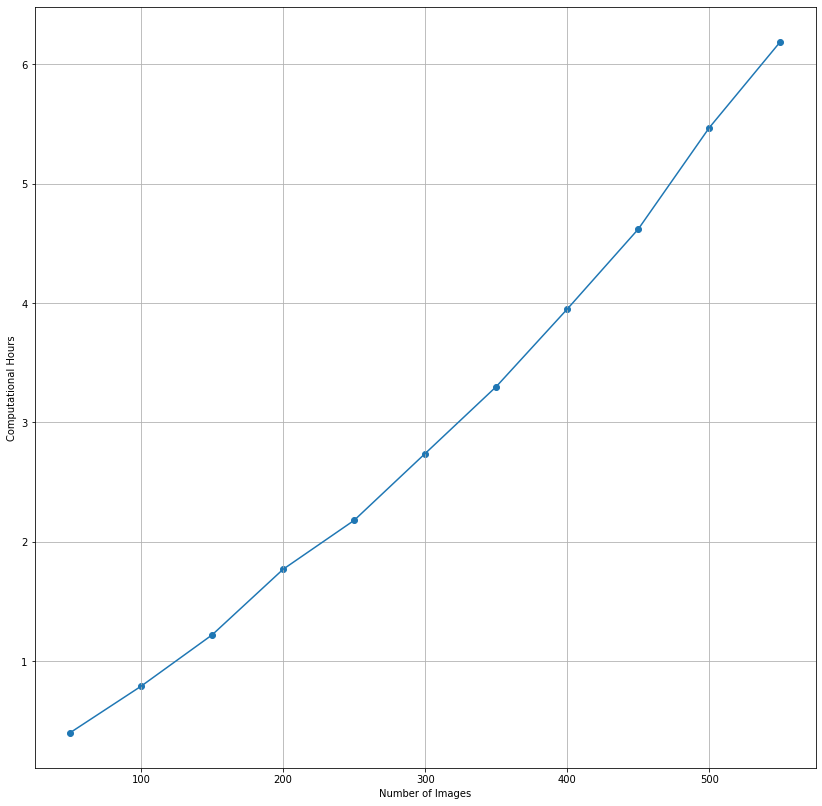

In [16]:
#aqui lo que estamos haciendo es generar una imagen que muestre de forma graficas los puntos que estan haciendo por a si decirlo 
#ruido y los marque de forma que muestre los puntos y de que forma tienen esos puntos desordenads.
fig = plt.figure(figsize=(14,14))
plt.scatter(processDf['Image Number'],processDf['Time Lapse (hr)'])
plt.plot(processDf['Image Number'],processDf['Time Lapse (hr)'])
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.grid()

In [27]:
#aqui lo que mostramos es como un orden de datos pero de forma ordenada, los datos que vemos en una forma grafica
# lo vemos en una tabla pero ordenandolos de forma gerargica de forma que podamos idenficiar como se basa la grafica.
nImages = processDf['Image Number'].values.reshape(-1,1)
Hours = processDf['Time Lapse (hr)'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(nImages, Hours)
Hours_pred = linear_regressor.predict(nImages)
Hours_pred

array([[0.08681818],
       [0.66272727],
       [1.23863636],
       [1.81454545],
       [2.39045455],
       [2.96636364],
       [3.54227273],
       [4.11818182],
       [4.69409091],
       [5.27      ],
       [5.84590909]])

In [28]:
#y=mx+c 
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
label = r'$Hours = %0.4f*numberImages %+0.4f$'%(m,c)
print(label)

$Hours = 0.0115*numberImages -0.4891$


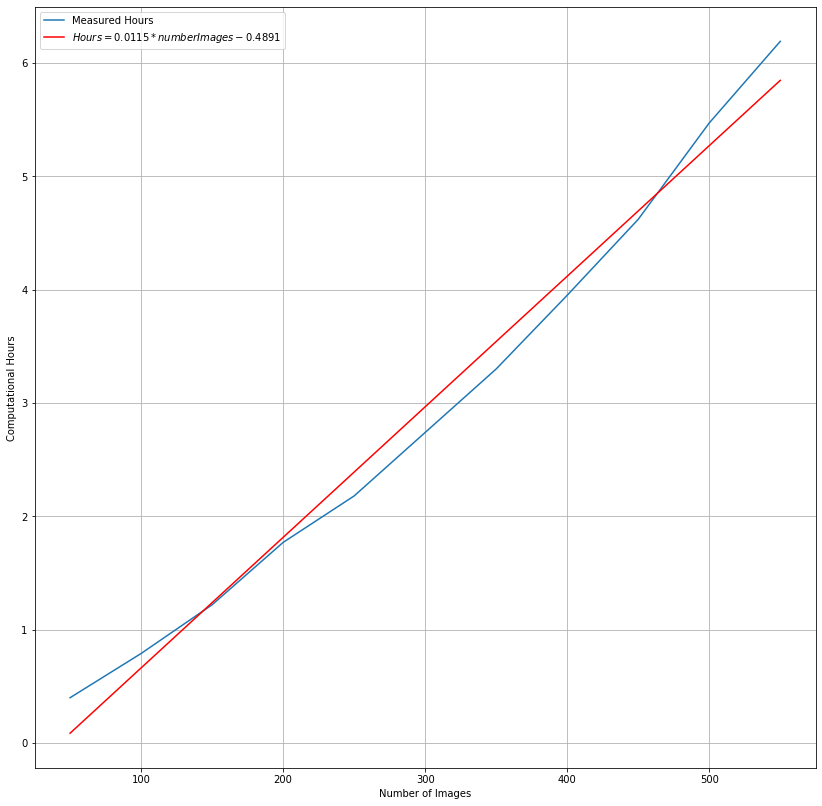

In [29]:
fig = plt.figure(figsize=(14,14))
#plt.scatter(processDf['Image Number'],processDf['Time Lapse (hr)'])
#aqui simplmenete generamos un orden anterior para que pueda obtener los puntos en el que se siga un orden o un patron
#como interpretamos en la tabla anterior no es mucha la distancia que hay entre otros puntos porque no hay demasiados datos
#sin embargo vemos que aun a si esos pequeños datos nos hacen ruido y el codigo lo que hace es buscar entre ese ruido 
#datos cumunes que incrementen en su orden
plt.plot(processDf['Image Number'],processDf['Time Lapse (hr)'], label='Measured Hours')
plt.plot(nImages, Hours_pred, color='red', label=label)
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.legend()
plt.grid()